# Лаб 1. 

### УПР 2

In [156]:
from thinkdsp import read_wave
import numpy as np

wave = read_wave("lab1_sound.wav") 

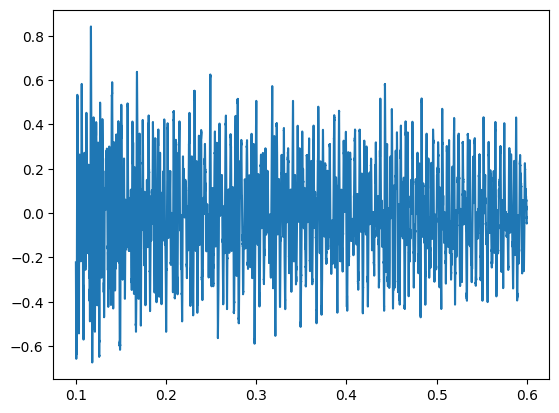

In [157]:
segment = wave.segment(start=0.1, duration=0.5)
segment.plot()

In [158]:
segment.make_audio()

Начнем обработку сегмента сигнала.  
Посмотрим на его спектр

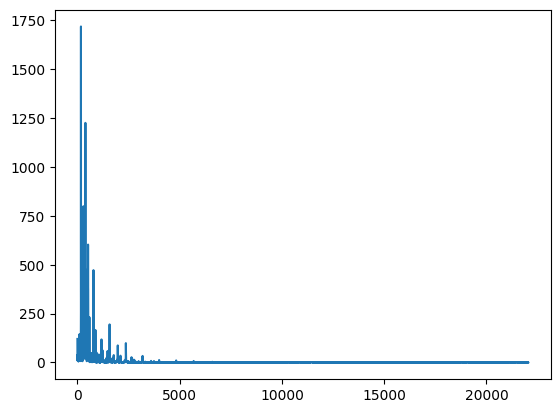

In [159]:
spectrum = segment.make_spectrum()
spectrum.plot()

Видим, что преобладают частоты до 5к Гц. Скорее всего, они лежат в диапазоне [500;1500] Гц

Ограничим отображение спектра до 3к Гц.

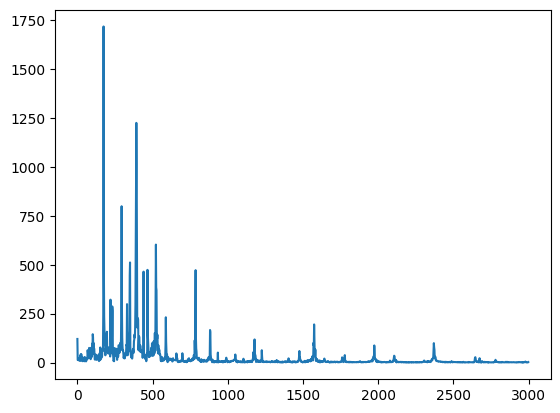

In [160]:
spectrum = segment.make_spectrum()
spectrum.plot(high=3000)

In [161]:
idx = np.argmax(spectrum.amps)
print(f"Максимальная амплитуда = {spectrum.amps[idx]}")
print(f"Доминирующая частота = {spectrum.fs[idx]} Гц")

Максимальная амплитуда = 1718.872353668957
Доминирующая частота = 174.0 Гц


Уберем все частоты, выше 1750 Гц

In [162]:
spectrum.low_pass(1750)

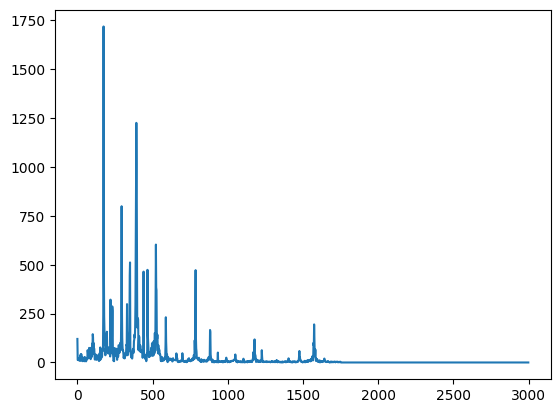

In [163]:
spectrum.plot(high=3000)

Звук стал более глухим

In [164]:
spectrum.make_wave().make_audio()

Уменьшим амплитуду всех частот ниже 1000 Гц на 80%

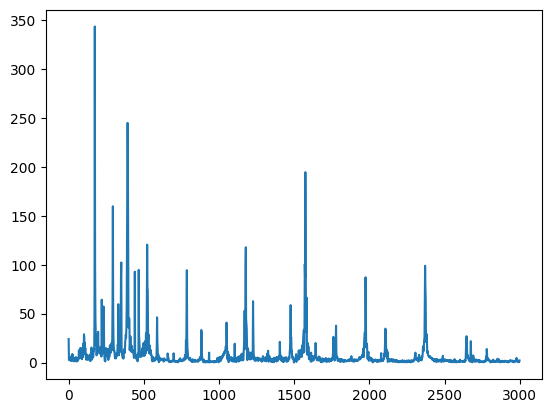

In [165]:
spectrum = segment.make_spectrum()
spectrum.high_pass(cutoff=1000, factor=0.2)
spectrum.plot(high=3000)

In [166]:
idx = np.argmax(spectrum.amps)
print(f"Максимальная амплитуда = {spectrum.amps[idx]}")
print(f"Доминирующая частота = {spectrum.fs[idx]} Гц")

Максимальная амплитуда = 343.7744707337914
Доминирующая частота = 174.0 Гц


Звук стал как будто чище. Ощущение, что записали на более качественный микрофон.

In [167]:
spectrum.make_wave().make_audio()

Теперь уменшим амплитуду в диапазоне частот [50;1000] на 99%

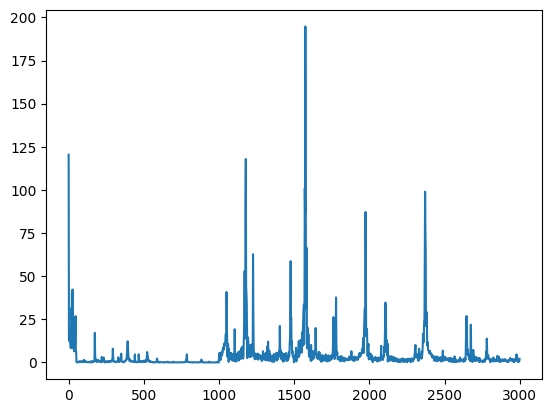

In [168]:
spectrum = segment.make_spectrum()
spectrum.band_stop(low_cutoff=50, high_cutoff=1000, factor=0.01)
spectrum.plot(high=3000)

In [169]:
idx = np.argmax(spectrum.amps)
print(f"Максимальная амплитуда = {spectrum.amps[idx]}")
print(f"Доминирующая частота = {spectrum.fs[idx]} Гц")

Максимальная амплитуда = 194.72715885402573
Доминирующая частота = 1574.0 Гц


Ощущение, что звук был записан на диктофон старого мобильного телефона (или проигрывается с некачественных динамиков)

In [170]:
spectrum.make_wave().make_audio()

### УПР 3

In [171]:
from thinkdsp import CosSignal, SinSignal
from numpy import pi

sig1 = CosSignal(freq=440, amp=2.0, offset=0)
sig2 = SinSignal(freq=1320, amp=0.5, offset=pi/2)

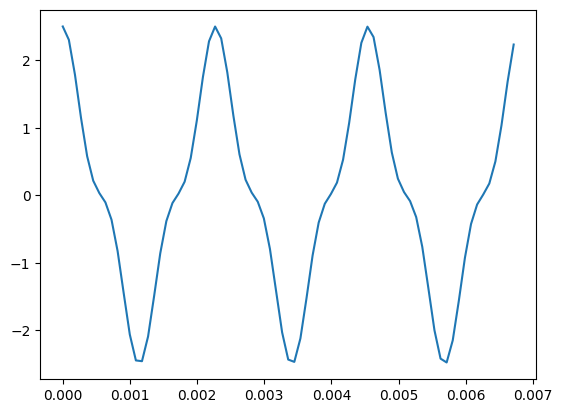

In [172]:
mix = sig1 + sig2
mix.plot()

In [173]:
wave = mix.make_wave()
wave.make_audio()

Спектр сигнала:

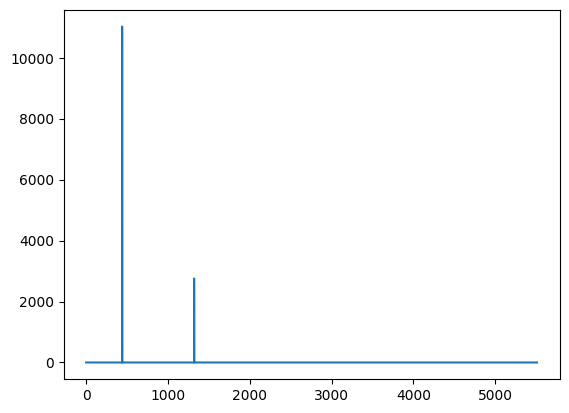

In [174]:
spectrum = wave.make_spectrum()
spectrum.plot()

Основная частота = 440 Гц  
Добавим к сигналу частоту 600 Гц и послушаем результат

In [181]:
new_mix = mix + SinSignal(freq=600, amp=1.0)
wave = new_mix.make_wave()

Слышен как будто посторонний сигнал на заднем фоне

In [182]:
wave.make_audio()

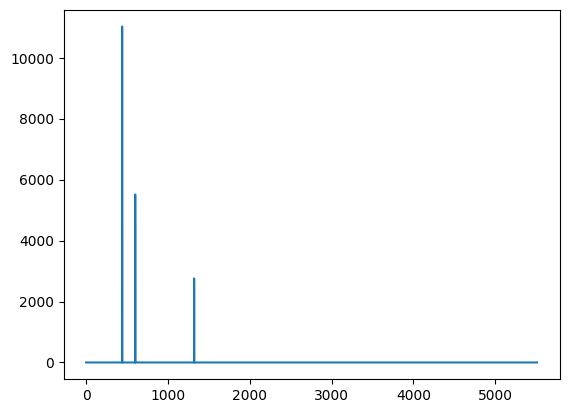

In [183]:
wave.make_spectrum().plot()

### УПР 4

Действия с коэфф. **k** для *ts* и *framerate* обратные, т.к. framerate = кол-ву измерений за *1 секунду*  
Т.е., увеличив продолжительность в k секунд, кол-во измерений изменится в framerate * k

In [177]:
def stretch(wave, k):
    wave.ts *= k
    wave.framerate /= k

In [178]:
wave = read_wave("lab1_sound.wav")

wave.make_audio()

In [179]:
stretch(wave, 0.5)

In [180]:
wave.make_audio()